# Q2

In [1]:
import cv2 # just for reading the image 
import numpy as np 
import matplotlib.pyplot as plt

read image "q2.png"

In [2]:
img = cv2.imread("q2.png", cv2.IMREAD_GRAYSCALE)

plot the image

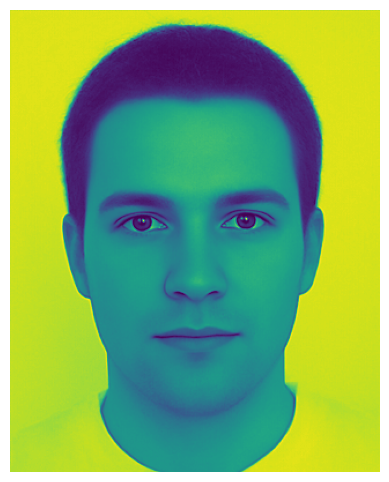

In [3]:
plt.figure(figsize=(8, 6))
plt.imshow(img)
plt.axis("off")  
plt.show()

In [4]:
def segment(image,seed_point,threshold,neighbor_mode=0):
    segmented_image = image.copy()
    ### neighbor_mode=0 => 4-connectivity
    ### neighbor_mode=1 => 8-connectivity

    # Condition for similarity between pixels and seed point
    cond = np.abs(segmented_image - segmented_image[seed_point]) <= threshold
    segmented_image[cond] = 255
    segmented_image[~ cond] = 0

    check = np.zeros_like(image)
    queue = [seed_point]
    check[seed_point] = 255
    while(len(queue) != 0):
        seed = queue.pop(0)
        for i in range(-1, 2):
            for j in range(-1, 2):
                x = seed[0] + i
                y = seed[1] + j
                if(x >= 0 and x < image.shape[0] and y >= 0 and y < image.shape[1]):
                    if((i*j == 0 or neighbor_mode) and (not check[(x, y)]) and (segmented_image[(x, y)])):
                        check[(x, y)] = 255
                        queue.append((x, y))

    return check

In [54]:
### YOUR CODE ###
seed_point=(200, 200)
threshold=(230)

In [55]:
segmented_image_4 = segment(img,seed_point,threshold)
segmented_image_8 = segment(img,seed_point,threshold,1)

plot the results and compare them

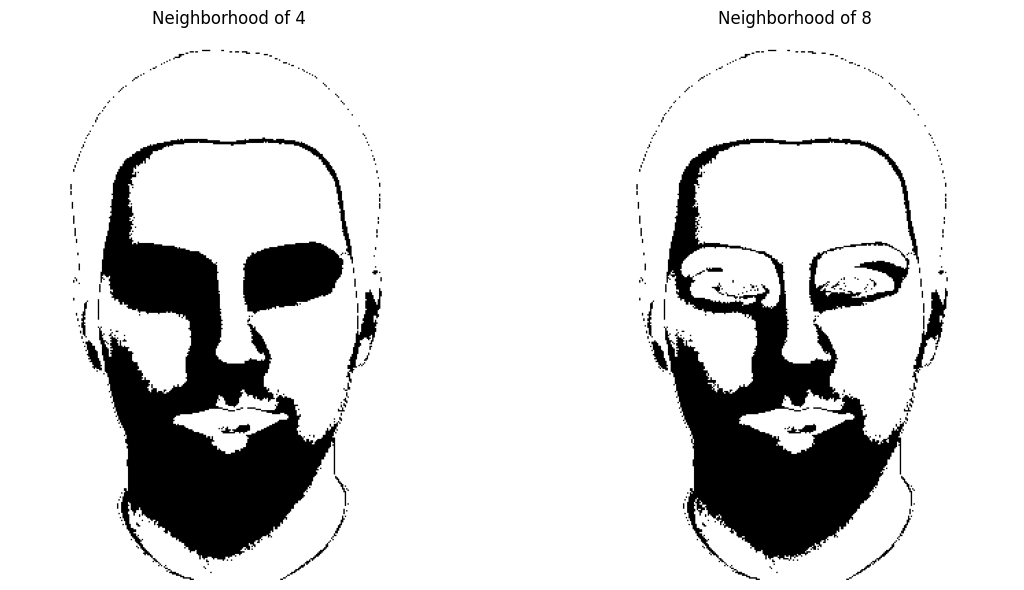

In [56]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title("Neighborhood of 4")
plt.imshow(segmented_image_4, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Neighborhood of 8")
plt.imshow(segmented_image_8, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()